In [25]:
import data_extraction as dx
import utils as ut
import data_preparation as dp
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = []
labels = []

In [9]:
dx.loadDataset("./dataset/Fnt", data, labels)

loading data set
loading current dir: B
loading current dir: H
loading current dir: 0
loading current dir: Q
loading current dir: V
loading current dir: 9
loading current dir: A
loading current dir: K
loading current dir: 4
loading current dir: 5
loading current dir: E
loading current dir: 2
loading current dir: G
loading current dir: 7
loading current dir: M
loading current dir: U
loading current dir: Y
loading current dir: I
loading current dir: W
loading current dir: Z
loading current dir: D
loading current dir: P
loading current dir: N
loading current dir: S
loading current dir: F
loading current dir: 1
loading current dir: 6
loading current dir: 3
loading current dir: L
loading current dir: C
loading current dir: X
loading current dir: R
loading current dir: 8
loading current dir: O
loading current dir: J
loading current dir: T
loading data set - done


In [10]:
dp.binarizeData(data)
dp.resizeData(data, 28)

In [11]:
dx.writeDataset("./dataset/bin", data, labels)

create empty dir
create empty dir - done
writting dataset
writting dir: B
writting dir: H
writting dir: 0
writting dir: Q
writting dir: V
writting dir: 9
writting dir: A
writting dir: K
writting dir: 4
writting dir: 5
writting dir: E
writting dir: 2
writting dir: G
writting dir: 7
writting dir: M
writting dir: U
writting dir: Y
writting dir: I
writting dir: W
writting dir: Z
writting dir: D
writting dir: P
writting dir: N
writting dir: S
writting dir: F
writting dir: 1
writting dir: 6
writting dir: 3
writting dir: L
writting dir: C
writting dir: X
writting dir: R
writting dir: 8
writting dir: O
writting dir: J
writting dir: T
writting dataset - done


In [ ]:
data = ut.loadData("data_bin")
labels = ut.loadData("labels")

36576
36576
shape: 28 28


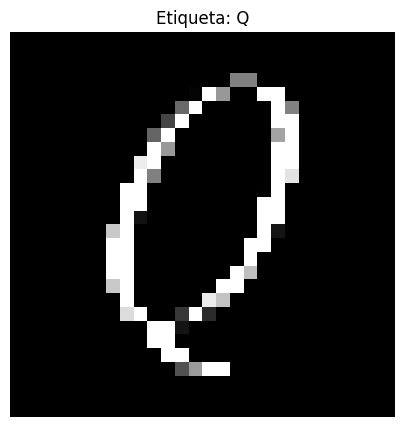

In [20]:
print(len(data))
print(len(labels))
n = 4000
img = data[n]
label = labels[n]
print("shape:", len(img), len(img[0]))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title(f'Etiqueta: {label}')
plt.axis('off')
plt.show()


In [26]:
data = np.array(data)
data = data.reshape(data.shape[0], -1)

In [21]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [27]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=3)


In [28]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, verbose=True)
poly = svm.SVC(kernel='poly', degree=3, C=1, verbose=True)

In [29]:
rbf.fit(x_train, y_train)
poly.fit(x_train, y_train)

[LibSVM]*
optimization finished, #iter = 780
obj = -143.109987, rho = 0.100000
nSV = 1560, nBSV = 1560
*
optimization finished, #iter = 792
obj = -144.237500, rho = 0.275000
nSV = 1578, nBSV = 1568
*
optimization finished, #iter = 780
obj = -143.400000, rho = 0.100000
nSV = 1560, nBSV = 1560
*
optimization finished, #iter = 790
obj = -143.559375, rho = 0.162500
nSV = 1569, nBSV = 1558
*
optimization finished, #iter = 776
obj = -141.491435, rho = -0.125000
nSV = 1546, nBSV = 1536
*
optimization finished, #iter = 784
obj = -143.485739, rho = 0.150000
nSV = 1568, nBSV = 1560
*
optimization finished, #iter = 785
obj = -142.809375, rho = 0.037500
nSV = 1559, nBSV = 1546
*
optimization finished, #iter = 794
obj = -144.184375, rho = 0.287500
nSV = 1579, nBSV = 1568
*
optimization finished, #iter = 785
obj = -142.809375, rho = 0.037500
nSV = 1559, nBSV = 1546
*
optimization finished, #iter = 778
obj = -141.504375, rho = -0.112500
nSV = 1547, nBSV = 1536
*
optimization finished, #iter = 790
obj

SVC(C=1, kernel='poly', verbose=True)

In [31]:
print(len(x_test))

7316


In [32]:
poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

In [33]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  90.35
F1 (Polynomial Kernel):  91.66


In [34]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  10.98
F1 (RBF Kernel):  15.97


In [39]:
ut.saveData("svm_rbf", rbf)
ut.saveData("svm_poly", poly)

In [38]:
print(poly)
print(rbf)

SVC(C=1, kernel='poly', verbose=True)
SVC(C=0.1, gamma=0.5, verbose=True)
